### **Miguel Angel Alvarez Guzman**

# Laboratorio 1

### **Comprobacion teorema de niquies**

**Objetivos:**

* Generacion de señal senoidal con frecuencia y amplitud variable
* Generacion de señal cuadrada con periodo y duty variable
* Generacion de ruido con 1 millon de muestras por segundo desde -N hasta N voltios
* Modular las señales
* Observarlas en osciloscopio
* Aplicar LPF con Fc variables

### **Generacion de senoidal**

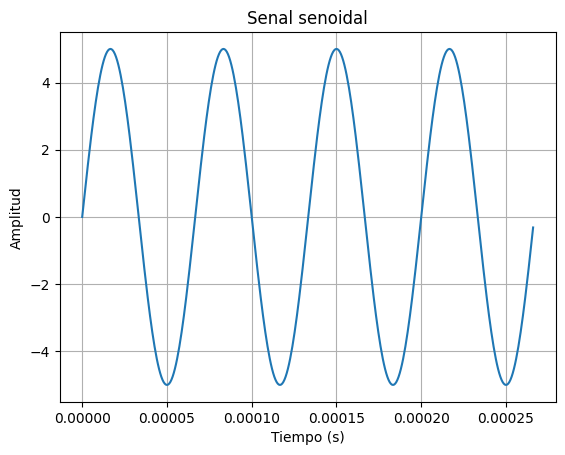

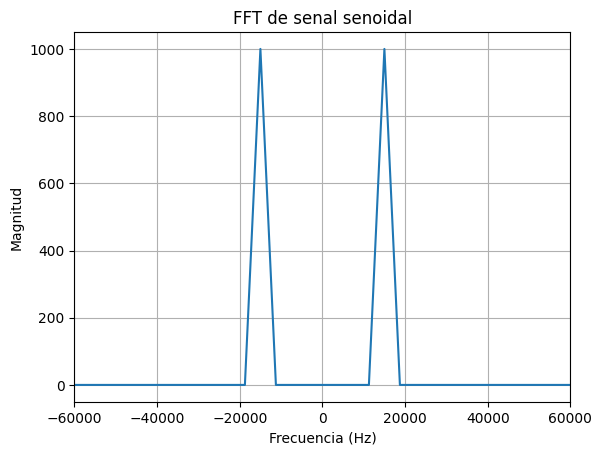

In [4]:
import numpy, scipy.special, scipy.stats
import matplotlib.pyplot as plt

# Definicion de funcion generadora de senoidal

def senoidal(f, A=1, phi=0,     duracion=None):
    #Duracion de 4 ciclos siempre
    duracion = 4 / f if duracion is None else duracion
    fs = 100 * f  # frecuencia de muestreo
    t = numpy.arange(0, duracion, 1/fs)
    x = A * numpy.sin(2 * numpy.pi * f * t + phi)
    return t, x

# Prueba de senal senoidal
fs = 15000      # frecuencia de la senal
A = 5      # amplitud de la senal
t, x = senoidal(fs, A)
plt.figure()
plt.plot(t, x)
plt.title('Senal senoidal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# funcion para aplicacion de transformada de Fourier a senoidal
def aplicar_fft(x, fs):
    N = len(x)
    X = numpy.fft.fft(x)
    X = numpy.fft.fftshift(X)  # centrar la FFT
    f = numpy.fft.fftfreq(N, 1/fs)
    f = numpy.fft.fftshift(f)  # centrar las frecuencias
    return f, X

f,x = aplicar_fft(x, 100*fs)
plt.figure()
plt.plot(f, numpy.abs(x))
plt.title('FFT de senal senoidal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-4*fs, 4*fs)
plt.grid()
plt.show()


### **Generacion de Cuadrada**

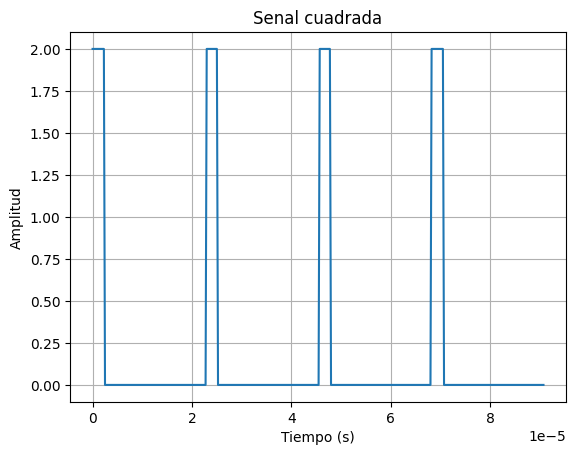

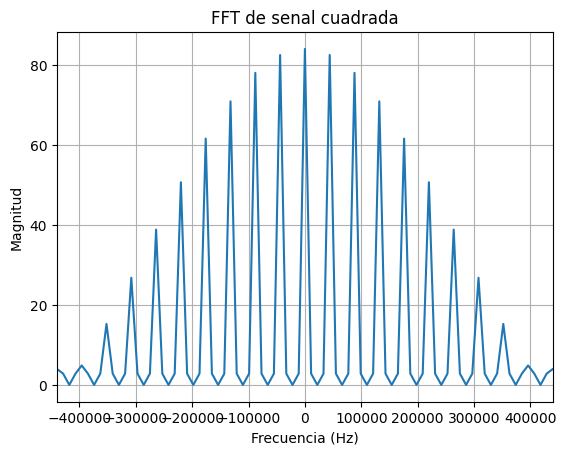

In [5]:
# Cracion de funcion generadora de senal cuadrada
def cuadrada(f, A=1, duty_cycle=0.5):
    # Duracion de 4 ciclos siempre
    duracion = 4 / f
    fs = 100 * f  # frecuencia de muestreo
    t = numpy.arange(0, duracion, 1/fs)
    x = A * scipy.signal.square(2 * numpy.pi * f * t, duty=duty_cycle)+A
    return t, x
# Prueba de senal cuadrada
fs = 44000      # frecuencia de la senal
A = 1      # amplitud de la senal
duty = 0.10  # ciclo de trabajo
t, x = cuadrada(fs, A, duty)
plt.figure()
plt.plot(t, x)
plt.title('Senal cuadrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

# Aplicacion de FFT a senal cuadrada
f,x = aplicar_fft(x, 100*fs)
plt.figure()
plt.plot(f, numpy.abs(x))
plt.title('FFT de senal cuadrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10*fs, 10*fs)
plt.grid()
plt.show()

### **Generacion de Ruido blanco**

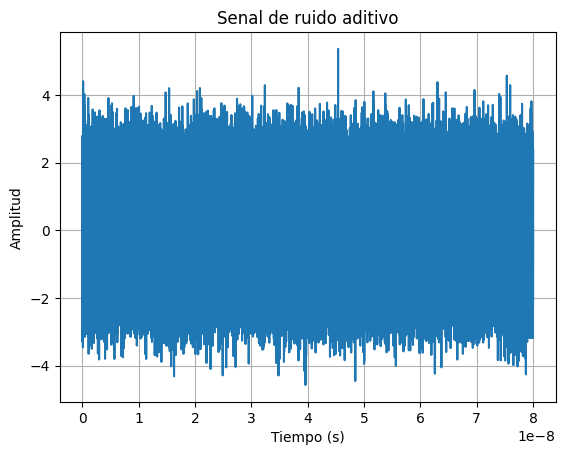

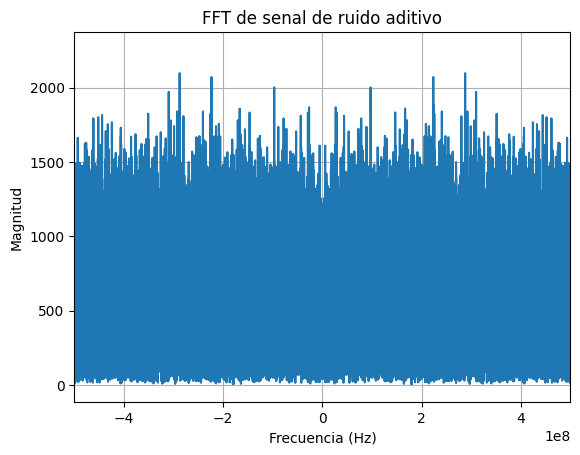

In [6]:
# Creacion de funcion generadora de ruido blanco
def ruido_adi(f, A=1):
    # Duracion de 4 ciclos siempre
    duracion = 4 / f
    fs = 100000 * f  # frecuencia de muestreo
    t = numpy.arange(0, duracion, 1/fs)
    x = A * numpy.random.normal(0, 1, len(t))
    return t, x
# Prueba de senal de ruido aditivo
fs = 50000000      # frecuencia de la senal
A = 1      # amplitud de la senal
t, x = ruido_adi(fs, A)
plt.figure()
plt.plot(t, x)
plt.title('Senal de ruido aditivo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()
# Aplicacion de FFT a senal de ruido aditivo
f,x = aplicar_fft(x, 100*fs)
plt.figure()
plt.plot(f, numpy.abs(x))
plt.title('FFT de senal de ruido aditivo')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(-10*fs, 10*fs)
plt.grid()
plt.show()

###  **Modulacion Multiplicativa de seno con cuadrada**

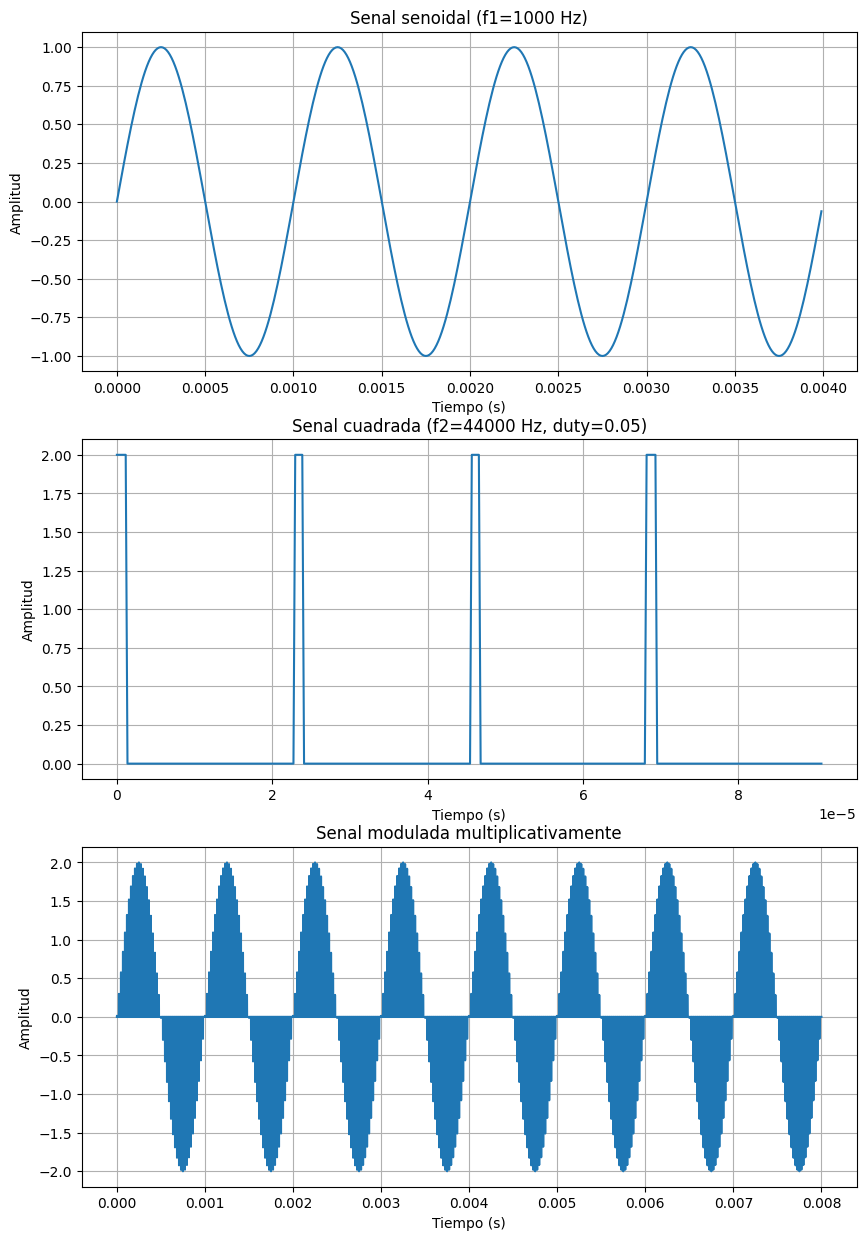

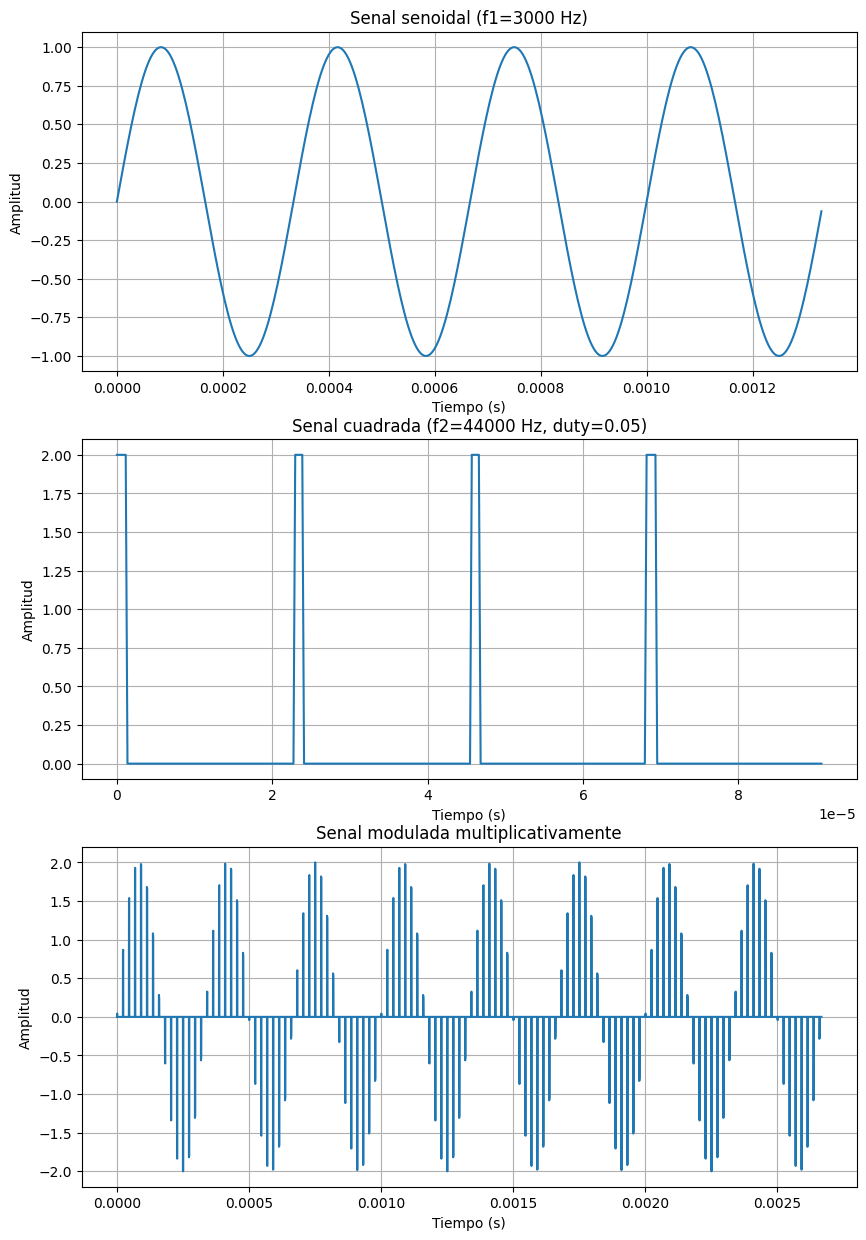

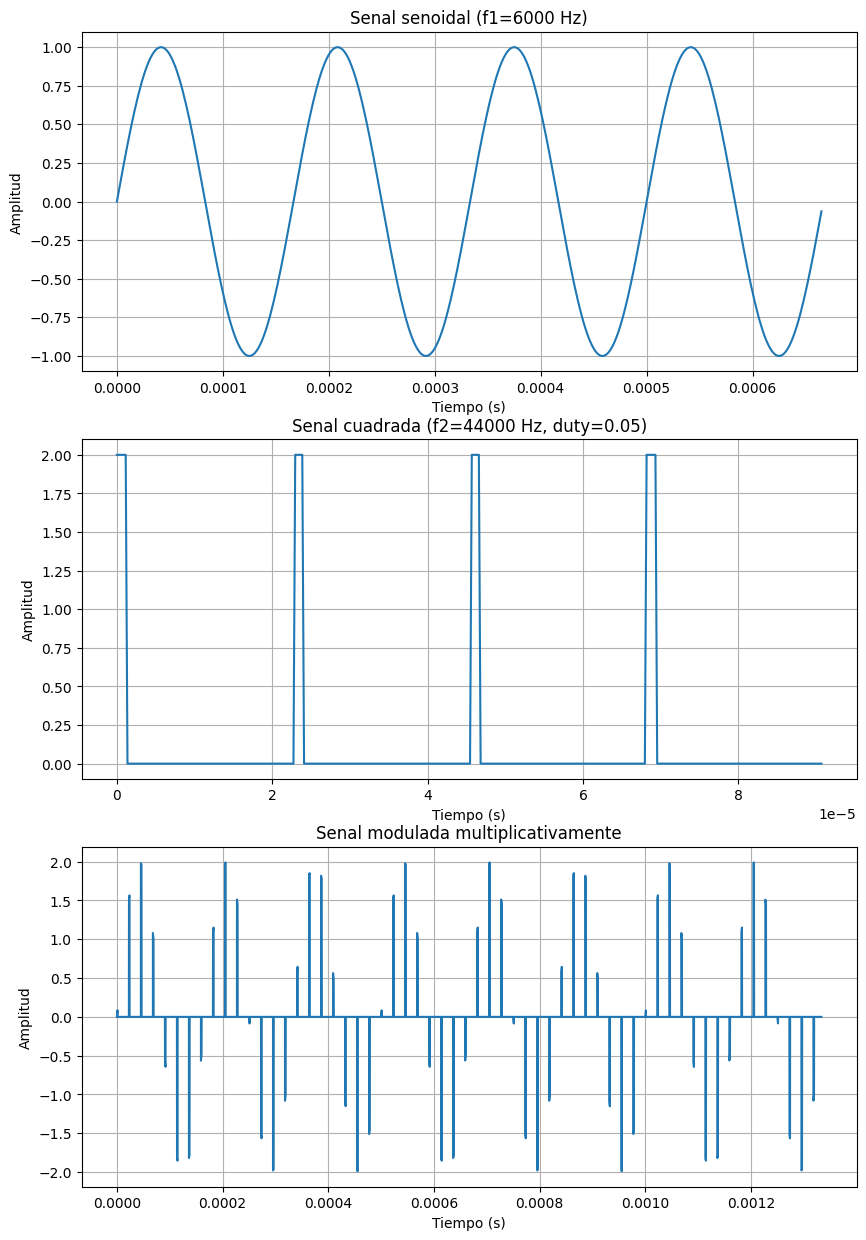

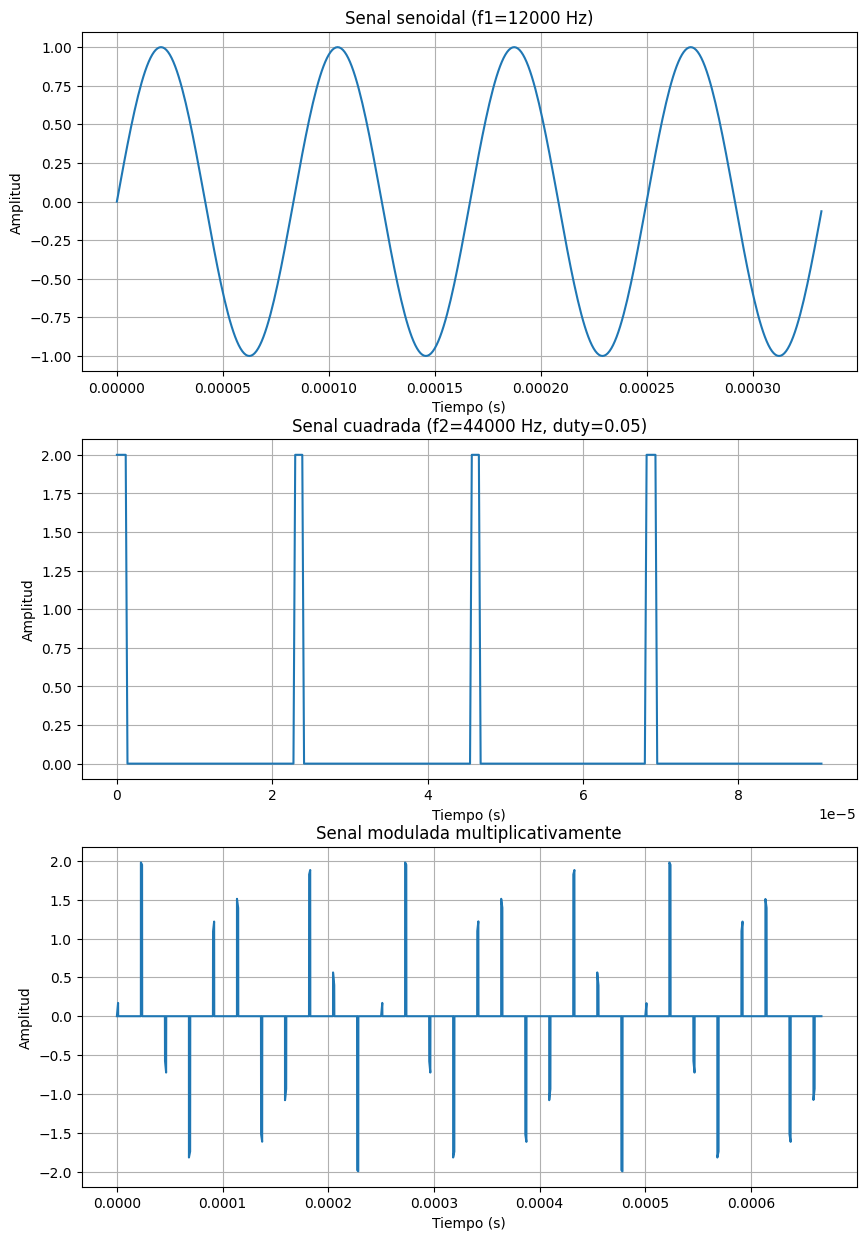

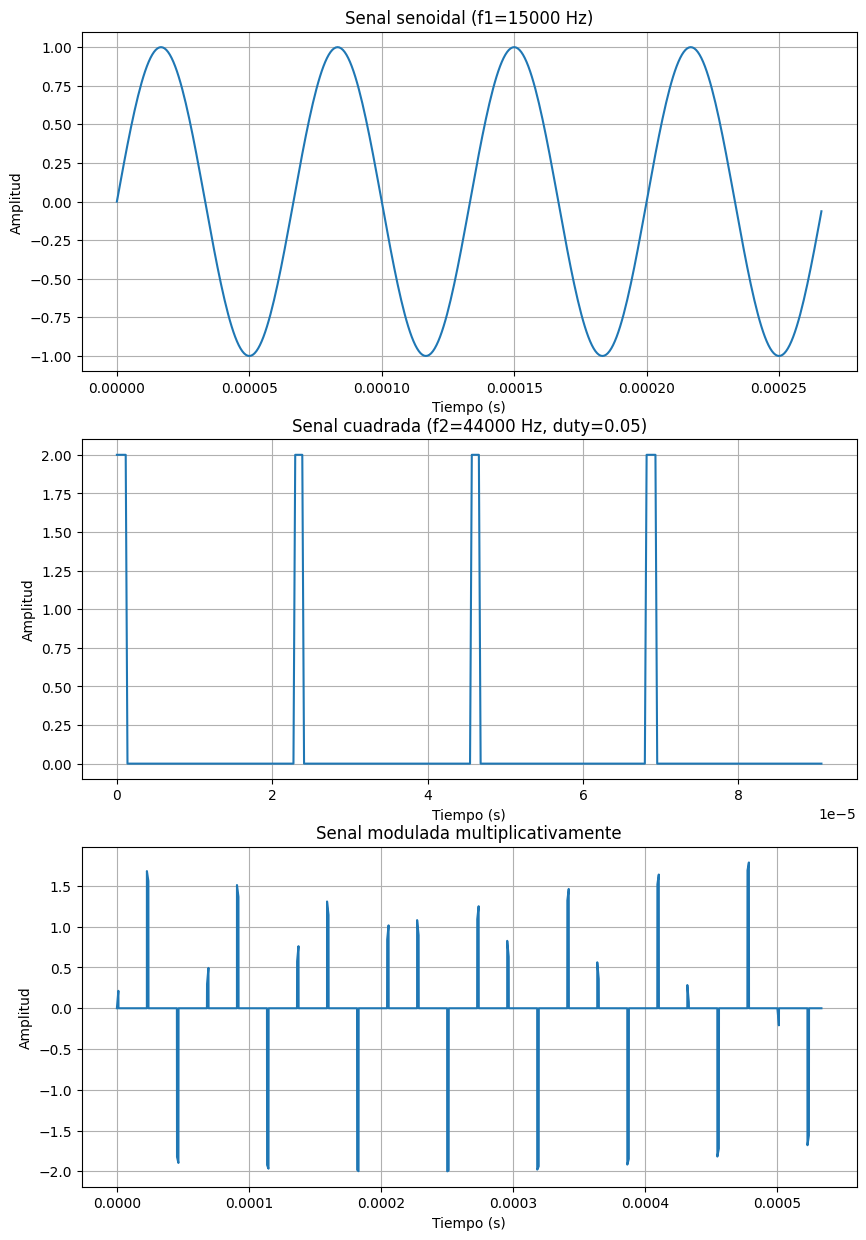

In [ ]:
# Creacion de funcion modulacion multiplicativa
def modulacion_mult(f1, f2, A1=1, A2=1, duty_cycle=0.5):
    # Duracion de 4 ciclos de la senal de menor frecuencia
    if f1 < f2:
        duracion = 8 / f1
        fs = 1000 * f2  # frecuencia de muestreo
    else:
        duracion = 8 / f2
        fs = 1000 * f1  # frecuencia de muestreo
    t = numpy.arange(0, duracion, 1/fs)
    x1 = A1 * numpy.sin(2 * numpy.pi * f1 * t)
    x2 = A2 * scipy.signal.square(2 * numpy.pi * f2 * t, duty=duty_cycle)+A2
    x = x1 * x2
    return t, x

# Prueba de modulacion multiplicativa
f1 = [1000, 3000, 6000, 12000, 15000]      # frecuencias para la senal 1
f2 = 44000      # frecuencia de la senal 2
A1 = 1      # amplitud de la senal 1
A2 = 1      # amplitud de la senal 2
duty = 0.05  # ciclo de trabajo de la senal 2
#modulacion para diferentes frecuencias de la senal 1
for freq in f1:
    t, x = modulacion_mult(freq, f2, A1, A2, duty)
    # Graficar senal senoidal, senal cuadrada y senal modulada en subplots
    t1, x1 = senoidal(freq, A1)
    t2, x2 = cuadrada(f2, A2, duty)
    plt.figure(figsize=(10, 15))
    plt.subplot(3, 1, 1)
    plt.plot(t1, x1)
    plt.title('Senal senoidal (f1={0} Hz)'.format(freq))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.subplot(3, 1, 2)
    plt.plot(t2, x2)
    plt.title('Senal cuadrada (f2={0} Hz, duty={1})'.format(f2, duty))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.subplot(3, 1, 3)
    plt.plot(t, x)
    plt.title('Senal modulada multiplicativamente')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()


### **Aplicacion De filtro LTF a señal Modulada**

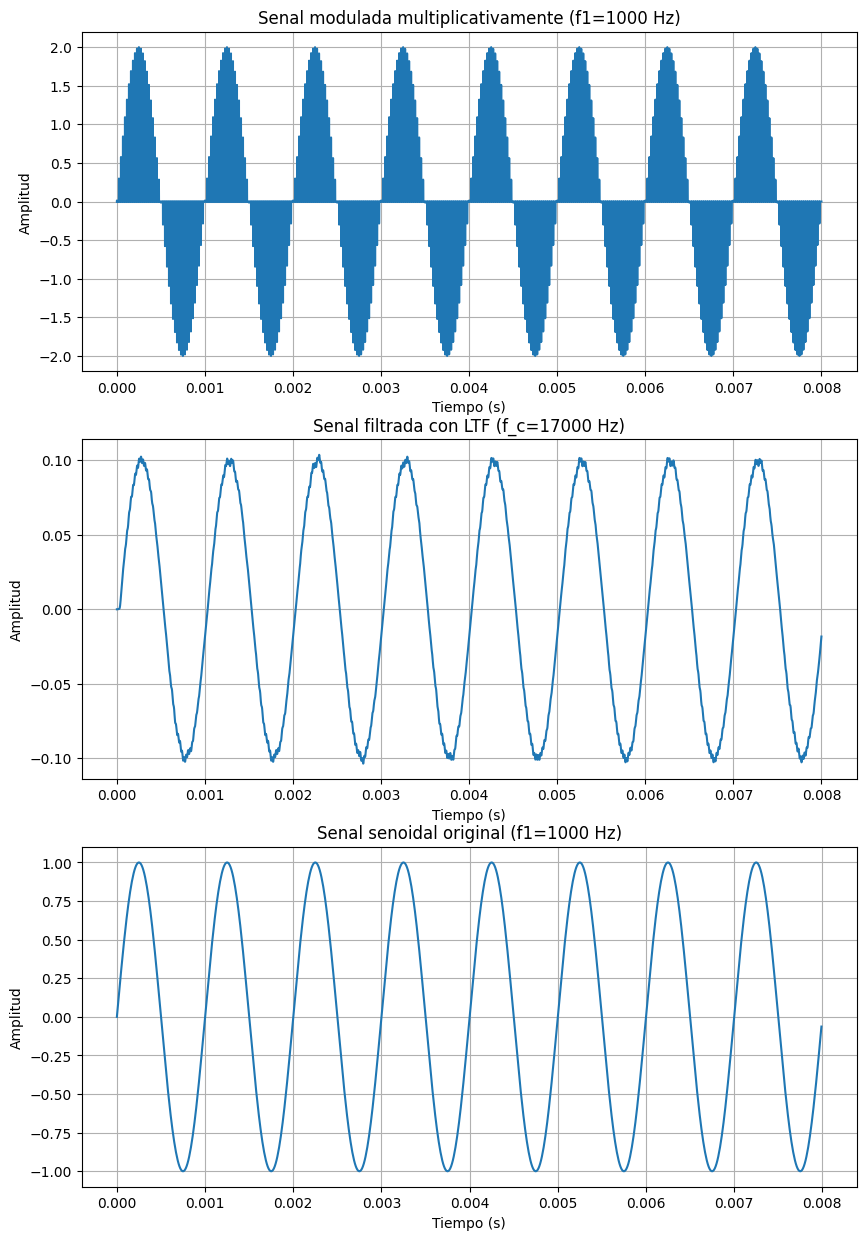

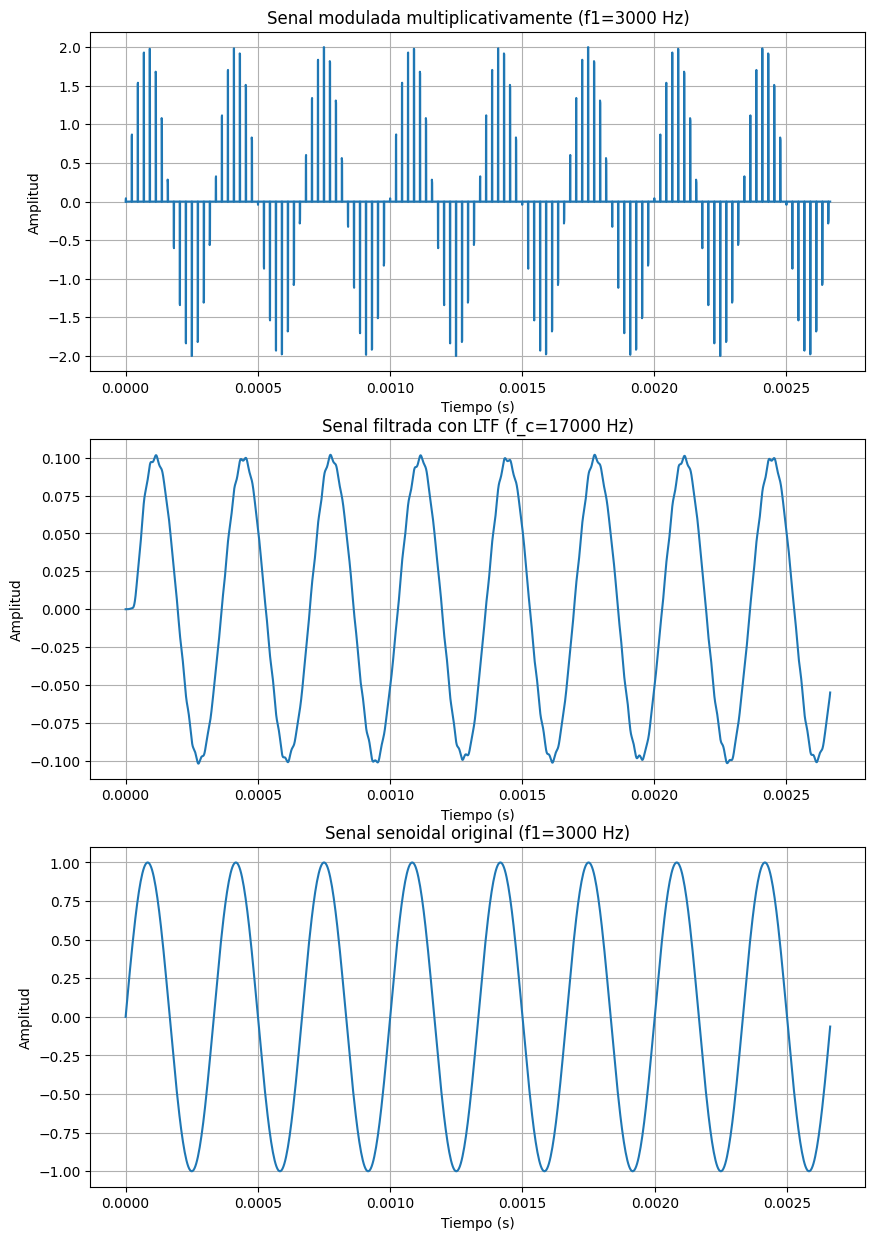

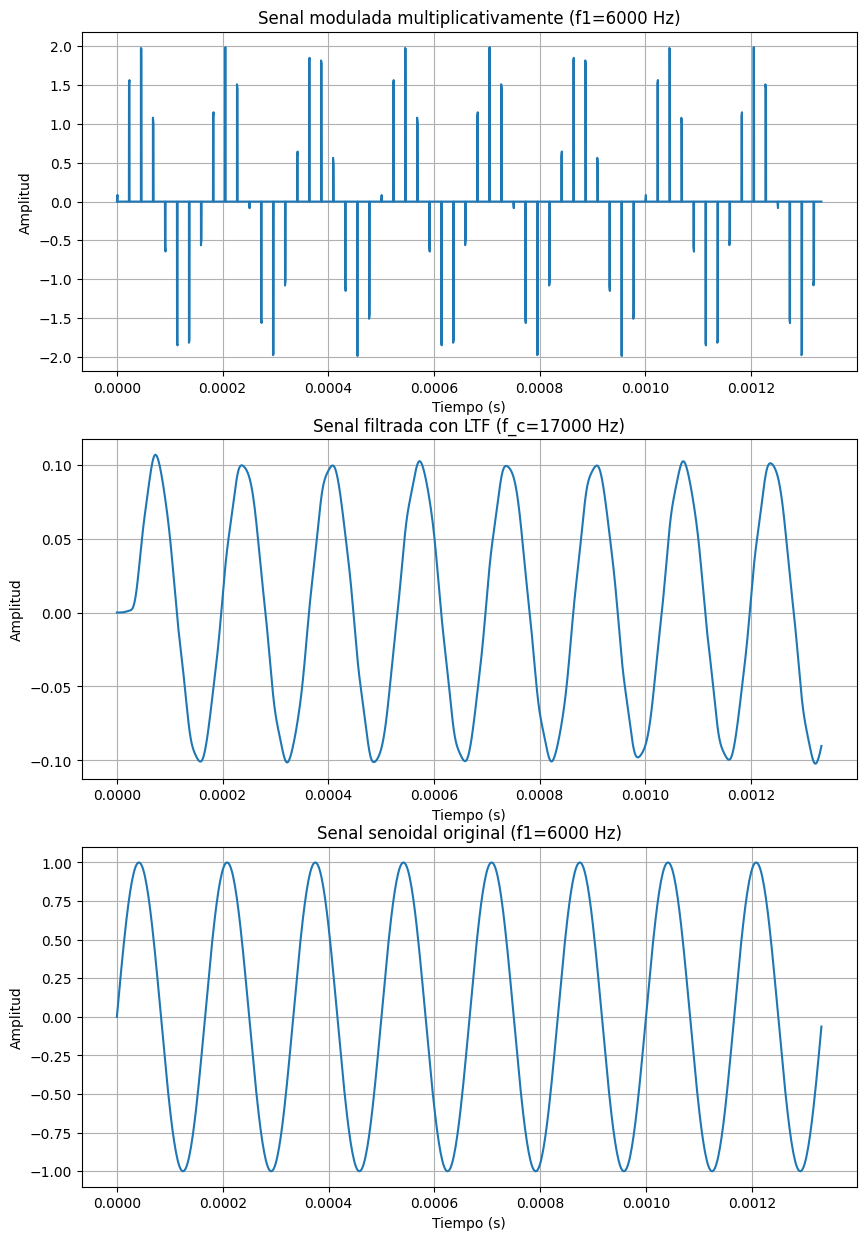

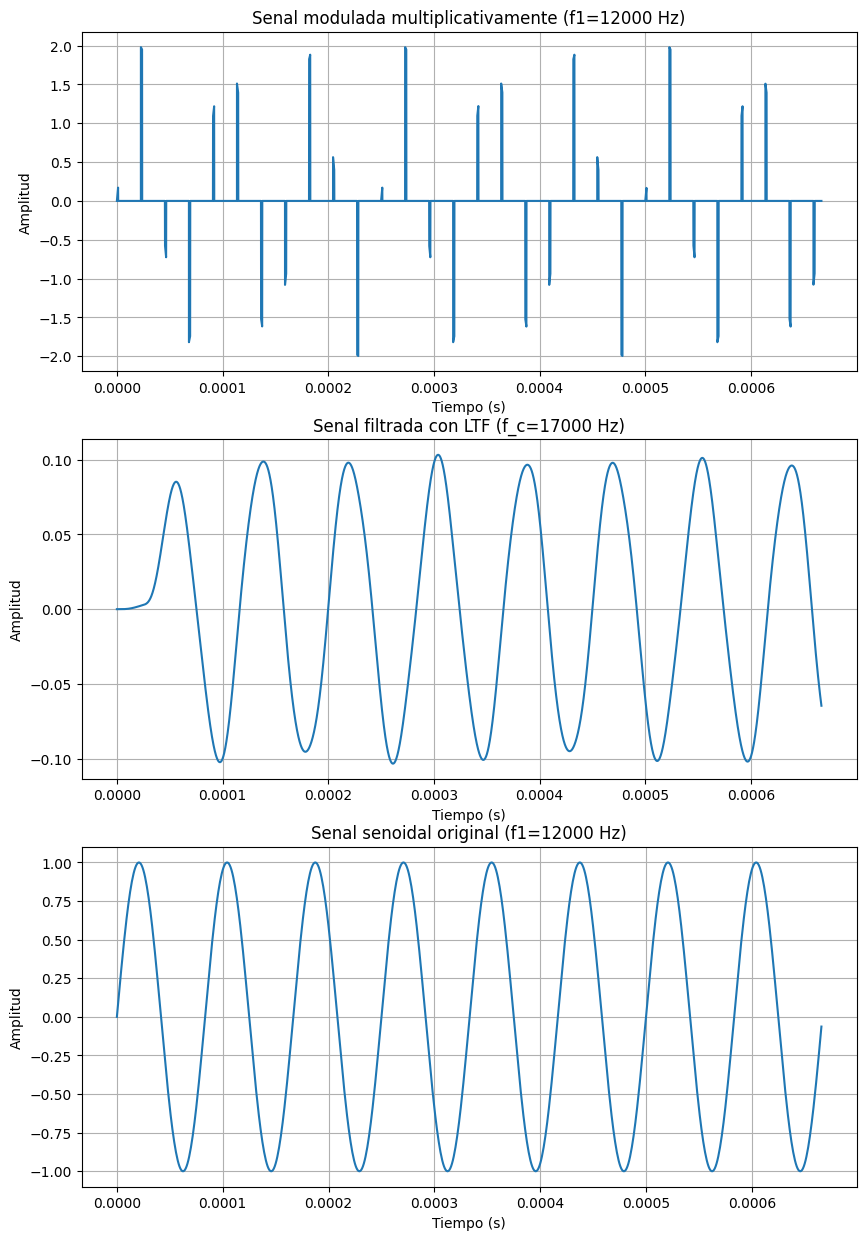

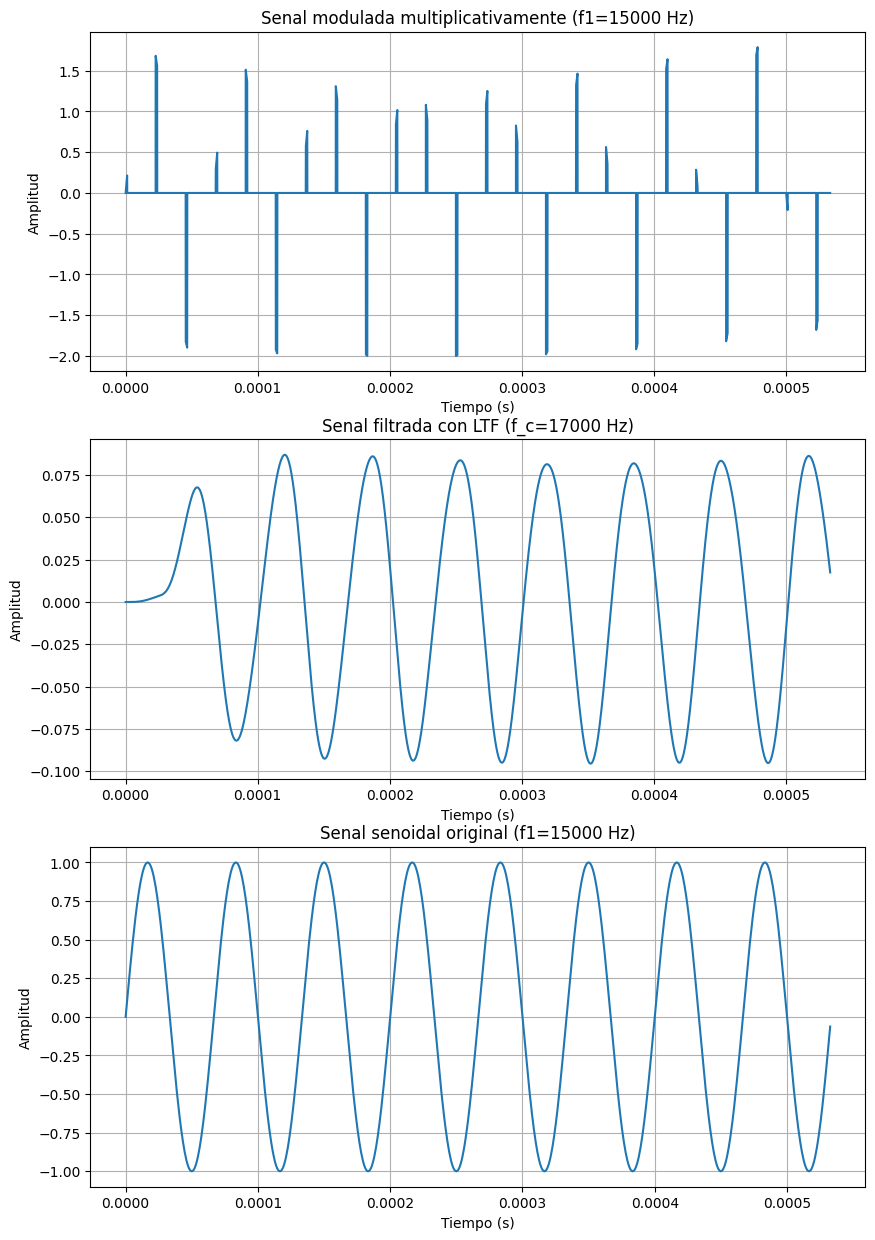

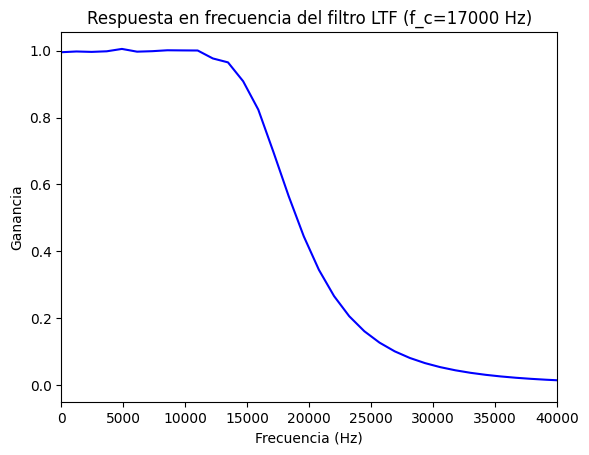

In [8]:
# Creacion de funcion de filtro LTF
from scipy.signal import lfilter
def filtro_LTF(f_c, fs, orden=10):
    # f_c: frecuencia de corte
    # fs: frecuencia de muestreo
    # orden: orden del filtro
    from scipy.signal import butter, lfilter
    nyquist = 0.5 * fs
    normal_cutoff = f_c / nyquist
    b, a = butter(orden, normal_cutoff, btype='low', analog=False)
    return b, a
# Aplicacion de filtro LTF a senal modulada
def aplicar_filtro(x, b, a):
    y = lfilter(b, a, x)
    return y
# Prueba de filtro LTF

f1 = [1000, 3000, 6000, 12000, 15000]      # frecuencias para la senal 1
f2 = 44000      # frecuencia de la senal 2
A1 = 1      # amplitud de la senal 1
A2 = 1      # amplitud de la senal 2
duty = 0.05  # ciclo de trabajo de la senal 2
#modulacion para diferentes frecuencias de la senal 1
for freq in f1:
    t, x = modulacion_mult(freq, f2, A1, A2, duty)
    plt.figure(figsize=(10, 15))
    plt.subplot(3,1,1)
    plt.plot(t, x)
    plt.title('Senal modulada multiplicativamente (f1={0} Hz)'.format(freq))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    #Filtrar para cada frecuencia
    f_c = 17000  # frecuencia de corte
    fs = 1000 * f2  # frecuencia de muestreo
    b, a = filtro_LTF(f_c, fs, orden=5)
    y = aplicar_filtro(x, b, a)
    # Graficar senal filtrada
    plt.subplot(3, 1, 2)
    plt.plot(t, y)
    plt.title('Senal filtrada con LTF (f_c={0} Hz)'.format(f_c))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    # Senal seno
    plt.subplot(3, 1, 3)
    t_seno, x_seno = senoidal(freq, A1,duracion=8/freq)
    plt.plot(t_seno, x_seno)
    plt.title('Senal senoidal original (f1={0} Hz)'.format(freq))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

# Filtro LTF

f_c = 17000  # frecuencia de corte
fs = 1000 * f2  # frecuencia de muestreo
b, a = filtro_LTF(f_c, fs, orden=5)
y = aplicar_filtro(x, b, a)
# Graficar senal modulada, respuesta natural del filtro y senal filtrada para 1,3,6 12,15 khz


w, h = scipy.signal.freqz(b, a, worN=18000)
plt.plot(0.5*fs*w/numpy.pi, numpy.abs(h), 'b')
plt.title('Respuesta en frecuencia del filtro LTF (f_c={0} Hz)'.format(f_c))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.xlim(0, 40000)
plt.show()

### **Adicion del Ruido a la señal Modulada**

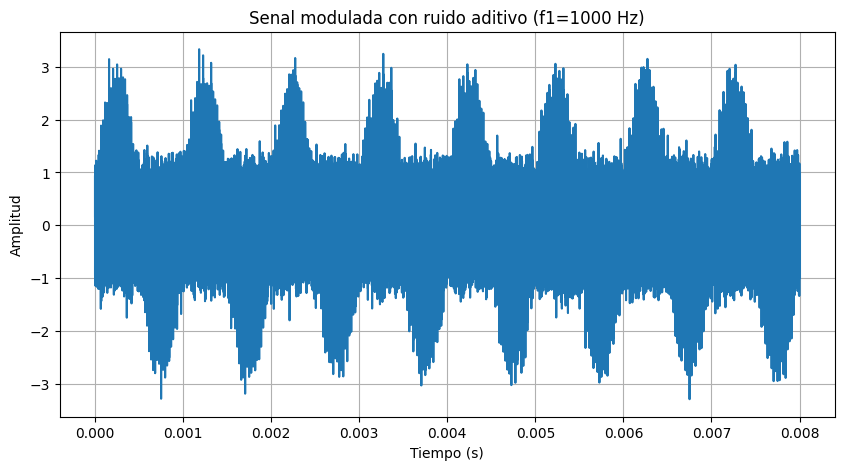

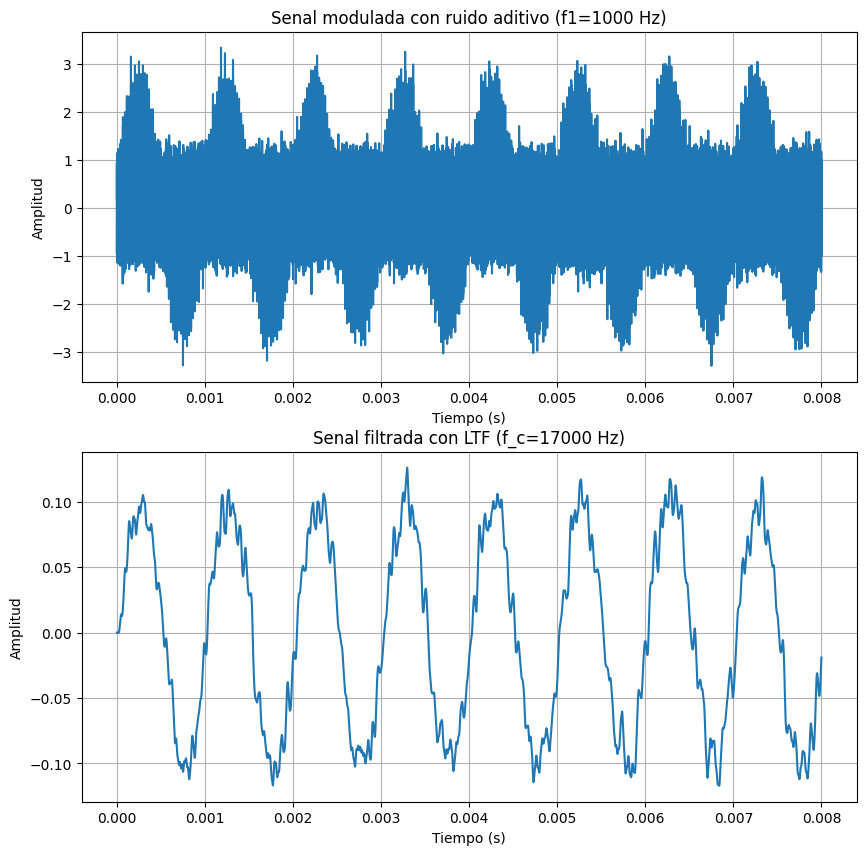

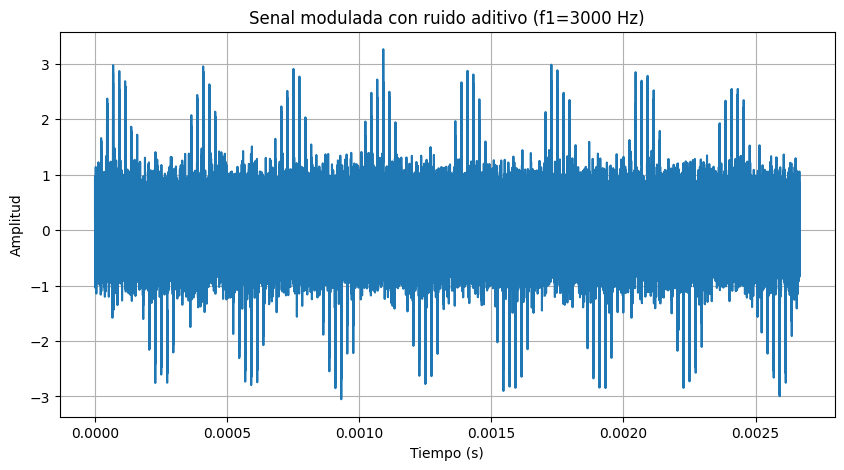

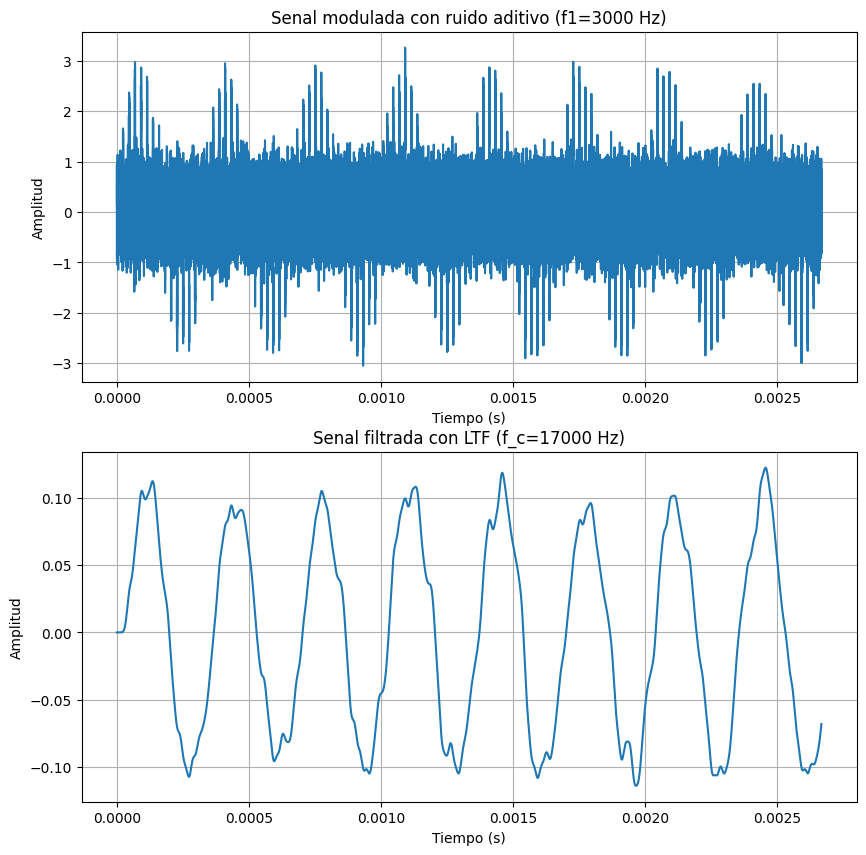

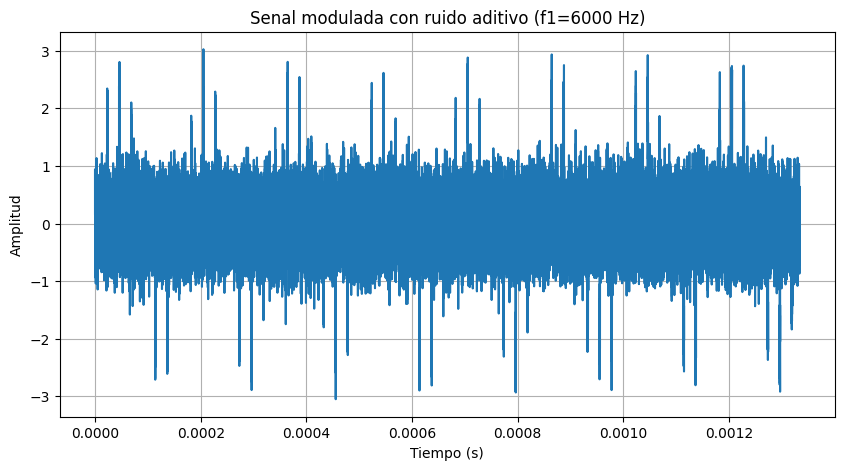

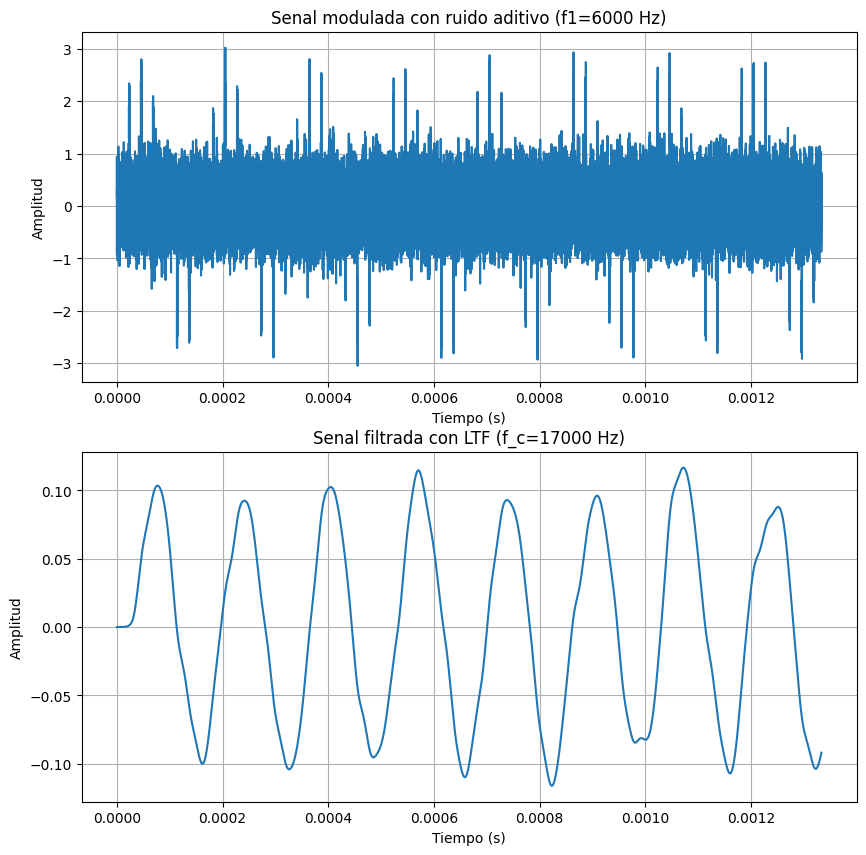

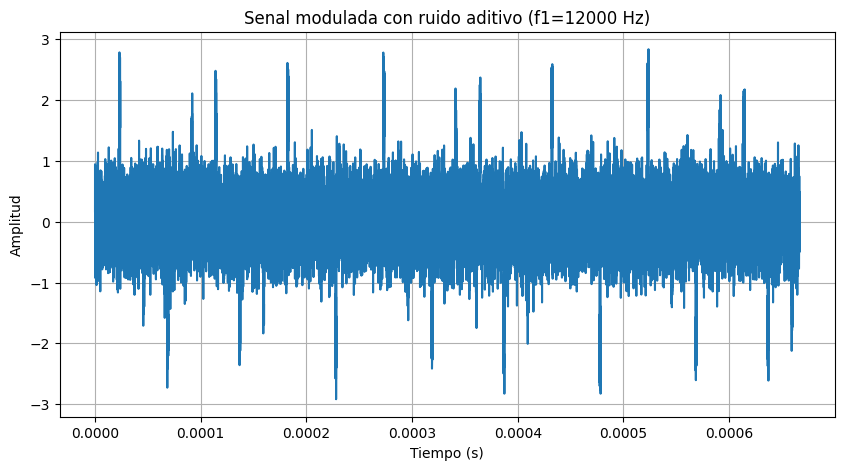

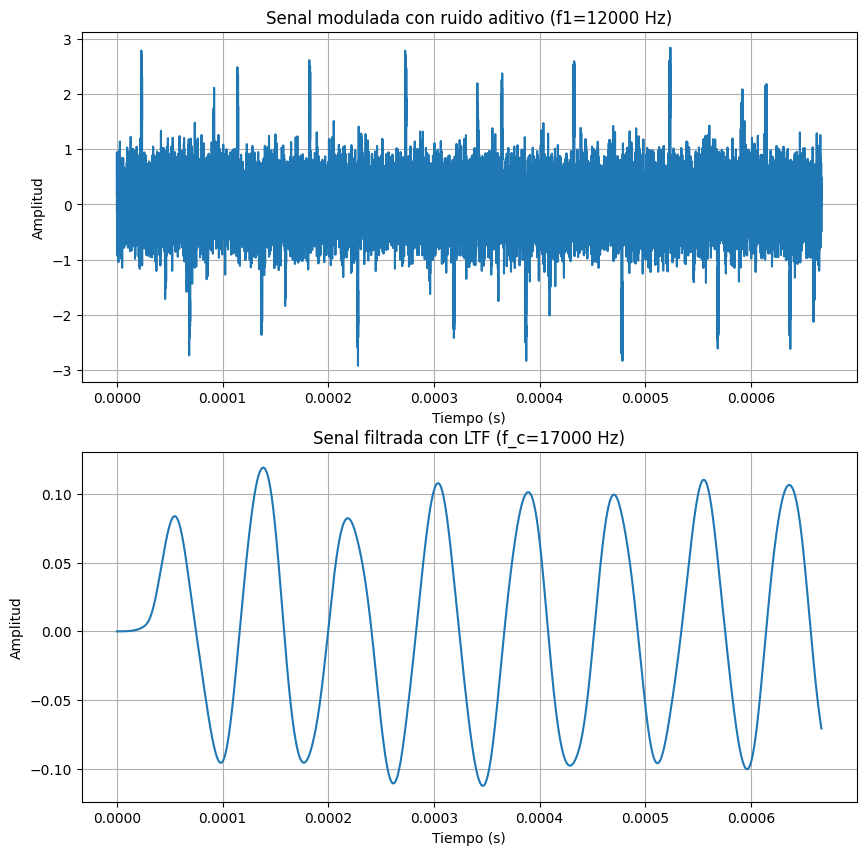

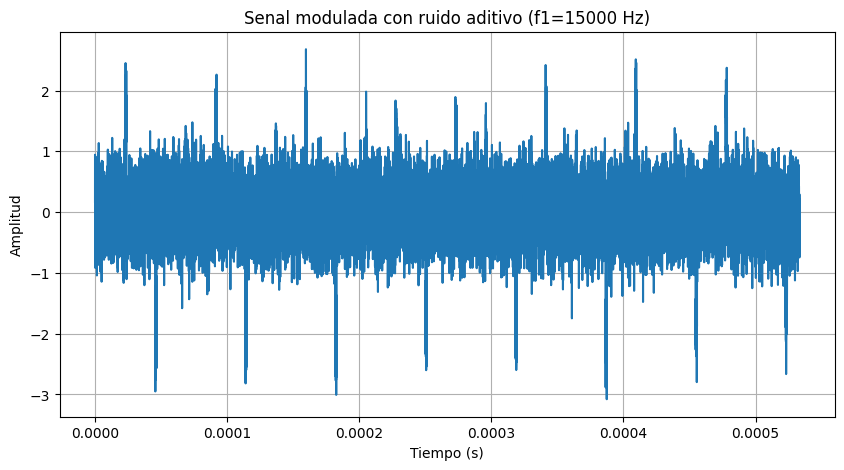

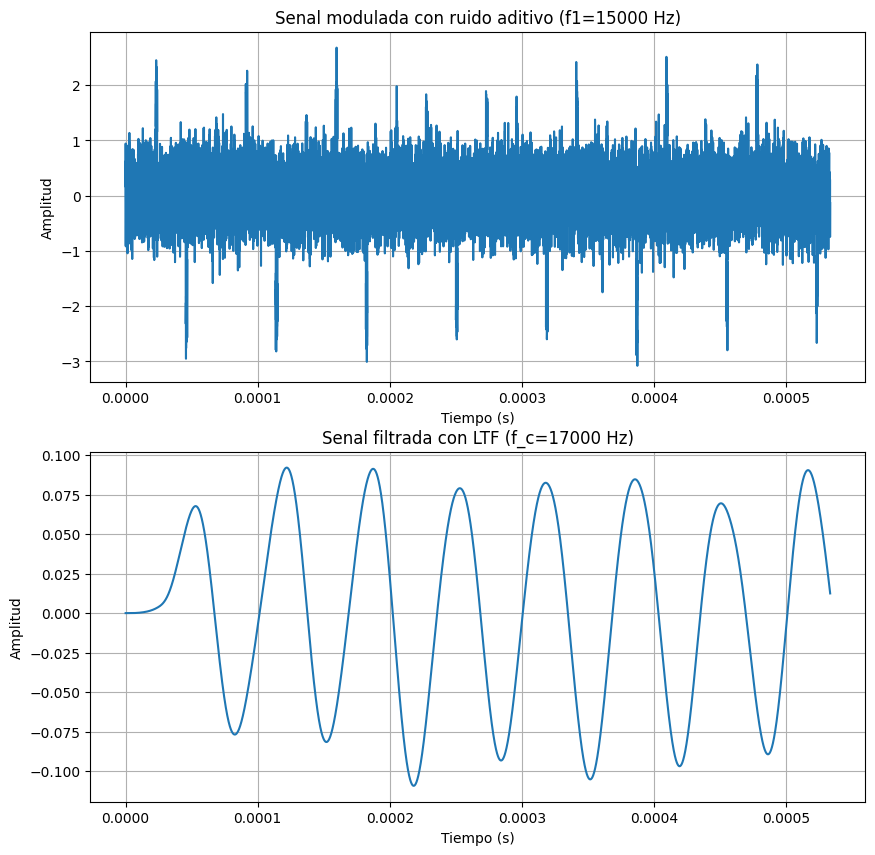

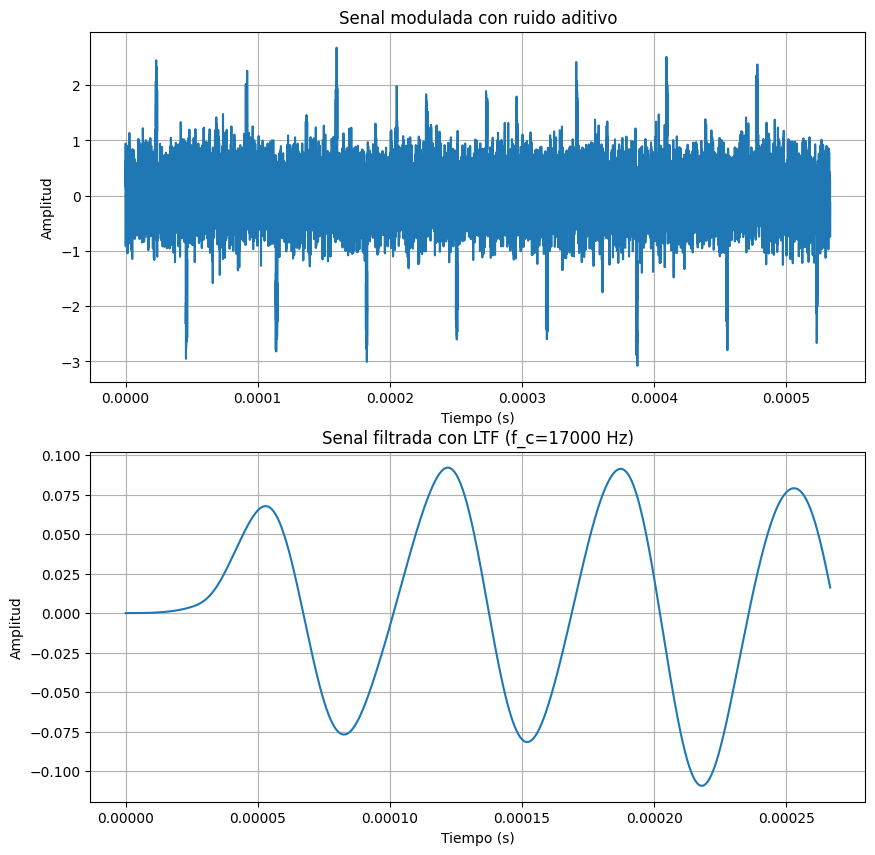

In [9]:
# Adicion del Ruido a la señal Modulada
f1 = [1000, 3000, 6000, 12000, 15000]      # frecuencias para la senal 1
f2 = 44000      # frecuencia de la senal 2
f3 = 10000000      # frecuencia de la senal de ruido
A1 = 1      # amplitud de la senal 1
A2 = 1      # amplitud de la senal 2
duty = 0.05  # ciclo de trabajo de la senal 2
t_r, x_r = ruido_adi(f3, A=0.4)


# Recorte de la senal de ruido para que tenga la misma duracion que la senal modulada


# Suma de la senal modulada y la senal de ruido para diferentes frecuencias de la senal 1
for freq in f1:
    t, x = modulacion_mult(freq, f2, A1, A2, duty)
    if(len(x_r) > len(x)):
        x_r = x_r[:len(x)]  
        t_r = t_r[:len(x)]
    else:
        x_r = numpy.pad(x_r, (0, len(x) - len(x_r)), 'constant')
        t_r = numpy.pad(t_r, (0, len(x) - len(t_r)), 'constant')
    x_noisy = x + x_r
    #graficar senal modulada con ruido
    plt.figure(figsize=(10, 5))
    plt.plot(t, x_noisy)
    plt.title('Senal modulada con ruido aditivo (f1={0} Hz)'.format(freq))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()
    # Filtrado de la senal modulada con ruido
    f_c = 17000  # frecuencia de corte
    fs = 1000 * f2  # frecuencia de muestreo
    b, a = filtro_LTF(f_c, fs, orden=5)
    y_noisy = aplicar_filtro(x_noisy, b, a)
    # Recorte de la senal filtrada para que tenga la misma duracion que la senal original
    y_noisy = y_noisy[:(int(len(t)))]
    t = t[:(int(len(x_noisy)))]
    # Graficar senal modulada con ruido y senal filtrada
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(t, x_noisy)
    plt.title('Senal modulada con ruido aditivo (f1={0} Hz)'.format(freq))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.plot(t, y_noisy)
    plt.title('Senal filtrada con LTF (f_c={0} Hz)'.format(f_c))
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()
    
tr=t
# Filtrado de la senal modulada con ruido
fs = 1000 * f2  
b, a = filtro_LTF(f_c, fs, orden=5)
y_noisy = aplicar_filtro(x_noisy, b, a)
# Recorte de la senal filtrada para que tenga la misma duracion que la senal original
y_noisy = y_noisy[:(int(len(t)/2))]
t = t[:(int(len(t)/2))]

# Graficar senal modulada con ruido y senal filtrada
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(tr, x_noisy)
plt.title('Senal modulada con ruido aditivo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t, y_noisy)
plt.title('Senal filtrada con LTF (f_c={0} Hz)'.format(f_c))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()